  Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3


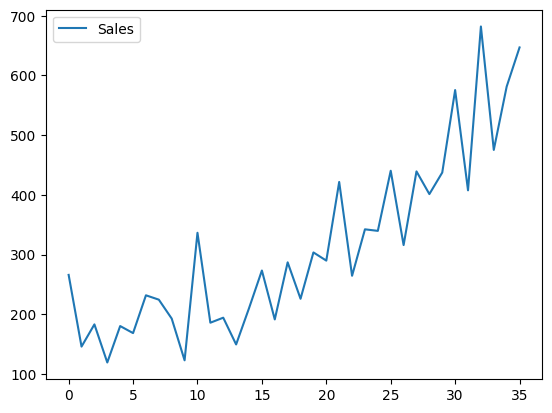

In [43]:
import pandas as pd
import matplotlib.pyplot  as plt
 
def parser(x):
	return pd.datetime.strptime('190'+x, '%d-%m')
 
df = pd.read_csv(r"D:\timpro\arima\shampoo_sales.csv")
print(df.head())
df.plot()
plt.show()

In [44]:
df

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [45]:
df.shape

(36, 2)

In [46]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [48]:
df['Month'] = pd.to_datetime(df['Month'],format='%d-%m')


In [49]:
df.set_index('Month',inplace=True)


In [51]:
df.head()


,Sales
Month,
1900-01-01,266.0
1900-02-01,145.9
1900-03-01,183.1
1900-04-01,119.3
1900-05-01,180.3


In [52]:
df.describe()


,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


<Axes: xlabel='Month'>

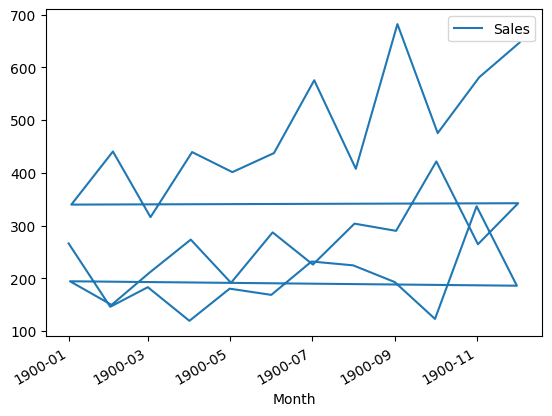

In [ ]:
df.plot()


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['Sales'])


In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
adfuller_test(df['Sales'])


ADF Test Statistic : 3.0601420836411775
p-value : 1.0
#Lags Used : 10
Number of Observations Used : 25
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)


In [ ]:
df['Sales'].shift(1)


Month
1900-01-01      NaN
1900-02-01    266.0
1900-03-01    145.9
1900-04-01    183.1
1900-05-01    119.3
1900-06-01    180.3
1900-07-01    168.5
1900-08-01    231.8
1900-09-01    224.5
1900-10-01    192.8
1900-11-01    122.9
1900-12-01    336.5
1900-01-02    185.9
1900-02-02    194.3
1900-03-02    149.5
1900-04-02    210.1
1900-05-02    273.3
1900-06-02    191.4
1900-07-02    287.0
1900-08-02    226.0
1900-09-02    303.6
1900-10-02    289.9
1900-11-02    421.6
1900-12-02    264.5
1900-01-03    342.3
1900-02-03    339.7
1900-03-03    440.4
1900-04-03    315.9
1900-05-03    439.3
1900-06-03    401.3
1900-07-03    437.4
1900-08-03    575.5
1900-09-03    407.6
1900-10-03    682.0
1900-11-03    475.3
1900-12-03    581.3
Name: Sales, dtype: float64

In [ ]:
df['Ten Difference']=df['Sales']-df['Sales'].shift(11)


In [ ]:
df.head(14)


,Sales,Sales First Difference,Ten Difference
Month,,,
1900-01-01,266.0,NaN,NaN
1900-02-01,145.9,-120.1,NaN
1900-03-01,183.1,37.2,NaN
1900-04-01,119.3,-63.8,NaN
1900-05-01,180.3,61.0,NaN
1900-06-01,168.5,-11.8,NaN
1900-07-01,231.8,63.3,NaN
1900-08-01,224.5,-7.3,NaN
1900-09-01,192.8,-31.7,NaN


In [ ]:
## Again test dickey fuller test
adfuller_test(df['Sales First Difference'].dropna())

ADF Test Statistic : -7.249074055553857
p-value : 1.7998574141686703e-10
#Lags Used : 1
Number of Observations Used : 33
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

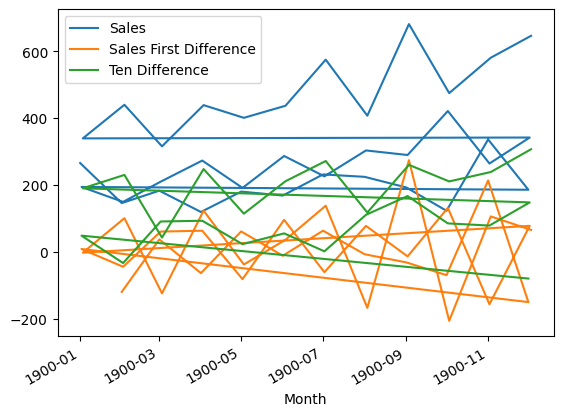

In [ ]:
df.plot()

In [ ]:
df['Sales First Difference']=df['Sales']-df['Sales'].shift()


In [ ]:
## Again test dickey fuller test
adfuller_test(df['Sales First Difference'].dropna())

ADF Test Statistic : -7.249074055553857
p-value : 1.7998574141686703e-10
#Lags Used : 1
Number of Observations Used : 33
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


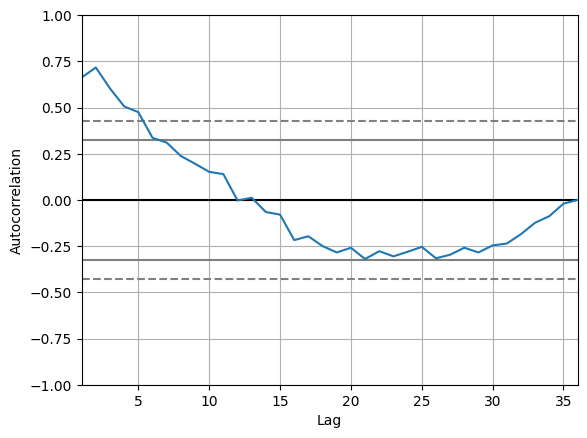

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Sales'])
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf



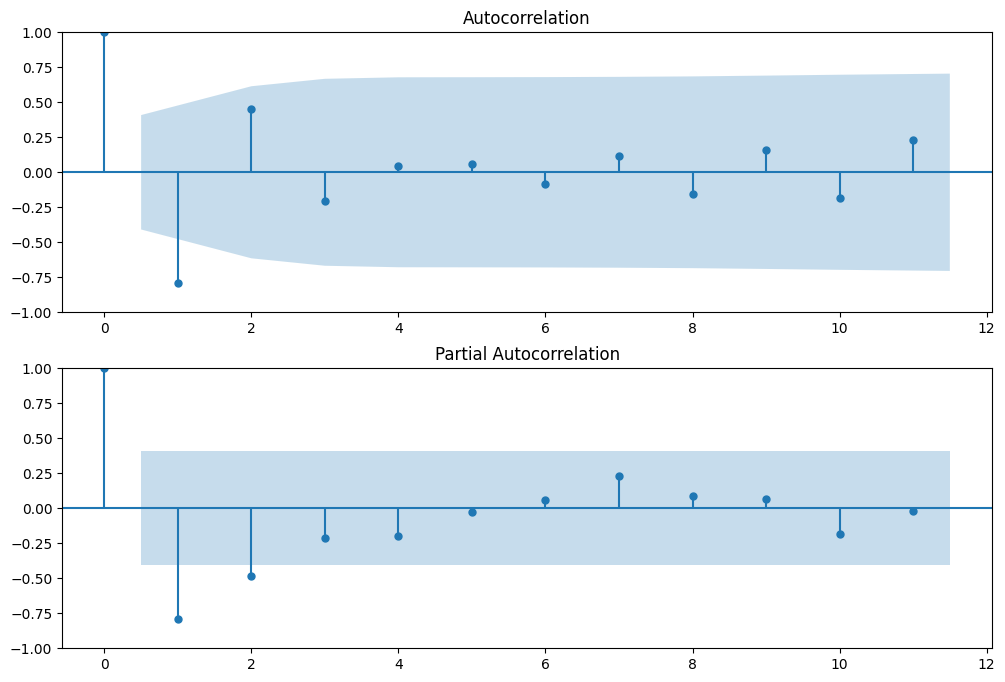

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)  # Create the first Axes object
ax2 = fig.add_subplot(212)  # Create the second Axes object
max_lags = 11  # Maximum lags for PACF (50% of data length)
fig = sm.graphics.tsa.plot_acf(df['Sales First Difference'].iloc[13:], lags=max_lags, ax=ax1)
fig = sm.graphics.tsa.plot_pacf(df['Sales First Difference'].iloc[13:], lags=max_lags, ax=ax2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
model = ARIMA(df['Sales'], order=(1, 1, 1))
model_fit = model.fit()


c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning

In [ ]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -200.391
Date:                Thu, 01 Feb 2024   AIC                            406.782
Time:                        12:06:49   BIC                            411.448
Sample:                             0   HQIC                           408.393
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6003      0.201     -2.980      0.003      -0.995      -0.205
ma.L1         -0.2756      0.267     -1.033      0.302      -0.799       0.248
sigma2      5382.0425   1386.817      3.881      0.000    2663.931    8100.154
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.46   Prob(JB):                         0.45
Heteroskedasticity (H):               1.62   Skew:                             0.43
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df

,Sales,Sales First Difference,Ten Difference
Month,,,
1900-01-01,266.0,NaN,NaN
1900-02-01,145.9,-120.1,NaN
1900-03-01,183.1,37.2,NaN
1900-04-01,119.3,-63.8,NaN
1900-05-01,180.3,61.0,NaN
1900-06-01,168.5,-11.8,NaN
1900-07-01,231.8,63.3,NaN
1900-08-01,224.5,-7.3,NaN
1900-09-01,192.8,-31.7,NaN


<Axes: xlabel='Month'>

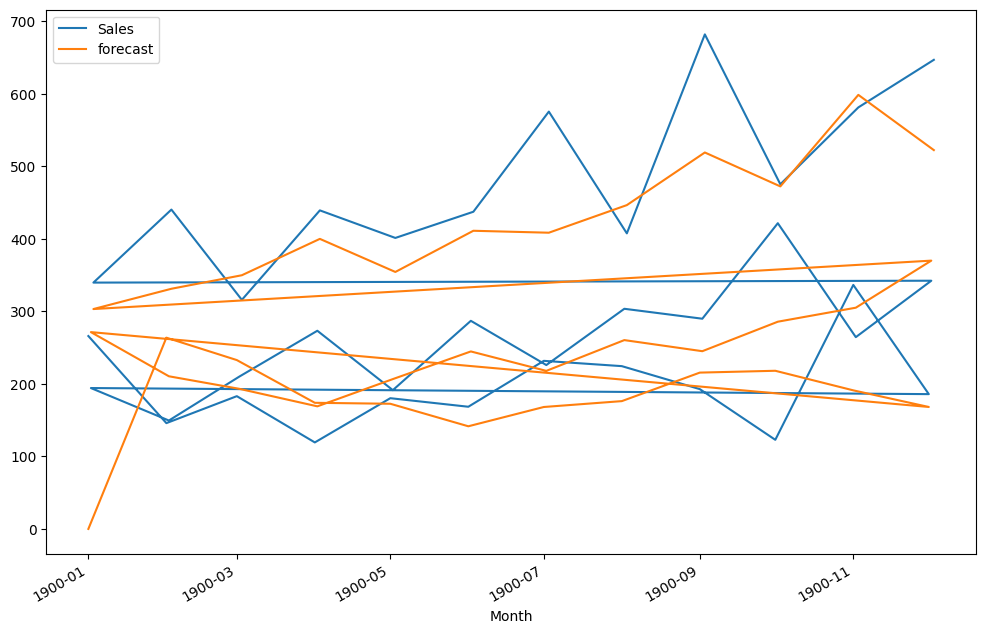

In [ ]:
df['forecast']=model_fit.predict()

df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm



In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarn

In [ ]:
df['forecast']

Month
1900-01-01      0.000000
1900-02-01    263.741568
1900-03-01    232.858499
1900-04-01    173.938385
1900-05-01    172.616282
1900-06-01    141.561471
1900-07-01    168.159560
1900-08-01    176.257660
1900-09-01    215.586200
1900-10-01    218.111281
1900-11-01    191.106082
1900-12-01    168.192717
1900-01-02    271.432079
1900-02-02    210.515883
1900-03-02    193.212547
1900-04-02    169.064434
1900-05-02    206.629018
1900-06-02    244.765898
1900-07-02    217.966303
1900-08-02    260.407045
1900-09-02    245.108301
1900-10-02    285.779480
1900-11-02    305.099837
1900-12-02    370.004701
1900-01-03    303.228737
1900-02-03    331.208854
1900-03-03    349.850114
1900-04-03    400.000572
1900-05-03    354.385457
1900-06-03    411.182859
1900-07-03    408.501564
1900-08-03    446.564484
1900-09-03    519.137736
1900-10-03    472.376978
1900-11-03    598.586404
1900-12-03    522.427463
Name: forecast, dtype: float64

In [ ]:
df['Sales']

Month
1900-01-01    266.0
1900-02-01    145.9
1900-03-01    183.1
1900-04-01    119.3
1900-05-01    180.3
1900-06-01    168.5
1900-07-01    231.8
1900-08-01    224.5
1900-09-01    192.8
1900-10-01    122.9
1900-11-01    336.5
1900-12-01    185.9
1900-01-02    194.3
1900-02-02    149.5
1900-03-02    210.1
1900-04-02    273.3
1900-05-02    191.4
1900-06-02    287.0
1900-07-02    226.0
1900-08-02    303.6
1900-09-02    289.9
1900-10-02    421.6
1900-11-02    264.5
1900-12-02    342.3
1900-01-03    339.7
1900-02-03    440.4
1900-03-03    315.9
1900-04-03    439.3
1900-05-03    401.3
1900-06-03    437.4
1900-07-03    575.5
1900-08-03    407.6
1900-09-03    682.0
1900-10-03    475.3
1900-11-03    581.3
1900-12-03    646.9
Name: Sales, dtype: float64

In [ ]:
df['forecast']=results.predict()
df['forecast'] = pd.to_datetime(df['forecast']) 

<Axes: xlabel='Month'>

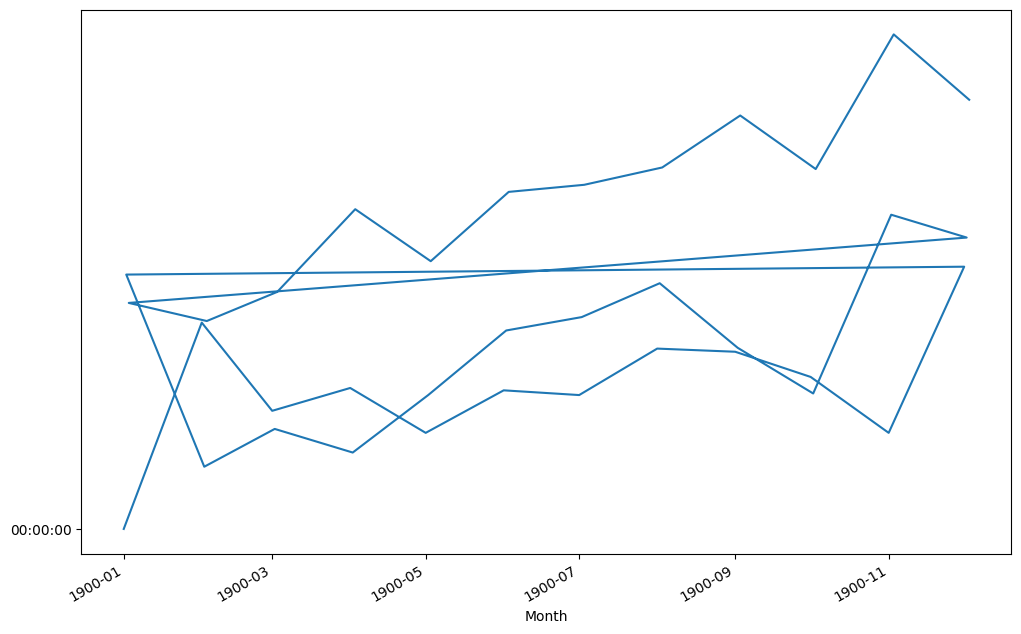

In [ ]:
df['forecast'].plot(figsize=(12,8))

In [ ]:
df['forecast']

Month
1900-01-01   1970-01-01 00:00:00.000000000
1900-02-01   1970-01-01 00:00:00.000000262
1900-03-01   1970-01-01 00:00:00.000000150
1900-04-01   1970-01-01 00:00:00.000000179
1900-05-01   1970-01-01 00:00:00.000000122
1900-06-01   1970-01-01 00:00:00.000000176
1900-07-01   1970-01-01 00:00:00.000000170
1900-08-01   1970-01-01 00:00:00.000000229
1900-09-01   1970-01-01 00:00:00.000000225
1900-10-01   1970-01-01 00:00:00.000000193
1900-11-01   1970-01-01 00:00:00.000000122
1900-12-01   1970-01-01 00:00:00.000000333
1900-01-02   1970-01-01 00:00:00.000000323
1900-02-02   1970-01-01 00:00:00.000000079
1900-03-02   1970-01-01 00:00:00.000000127
1900-04-02   1970-01-01 00:00:00.000000097
1900-05-02   1970-01-01 00:00:00.000000170
1900-06-02   1970-01-01 00:00:00.000000252
1900-07-02   1970-01-01 00:00:00.000000269
1900-08-02   1970-01-01 00:00:00.000000312
1900-09-02   1970-01-01 00:00:00.000000230
1900-10-02   1970-01-01 00:00:00.000000172
1900-11-02   1970-01-01 00:00:00.000000399
1900-

<Axes: xlabel='Month'>

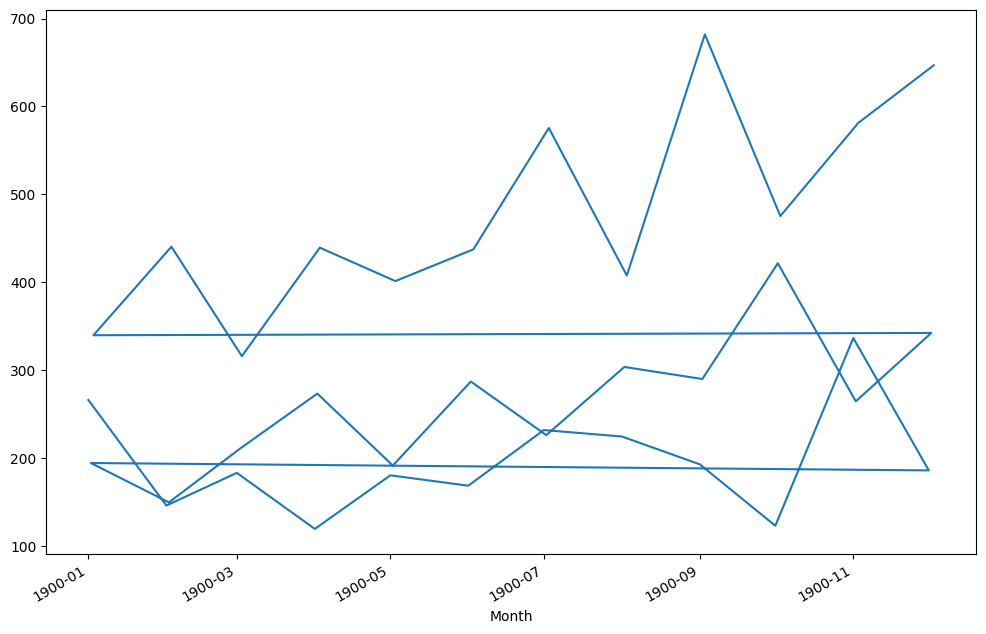

In [ ]:
df['Sales'].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


In [ ]:
future_datest_df.tail()


,Sales,Sales First Difference,Ten Difference,forecast
1902-07-03,NaN,NaN,NaN,NaN
1902-08-03,NaN,NaN,NaN,NaN
1902-09-03,NaN,NaN,NaN,NaN
1902-10-03,NaN,NaN,NaN,NaN
1902-11-03,NaN,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])


C:\Users\aravi\AppData\Local\Temp\ipykernel_2900\1188595892.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


<Axes: >

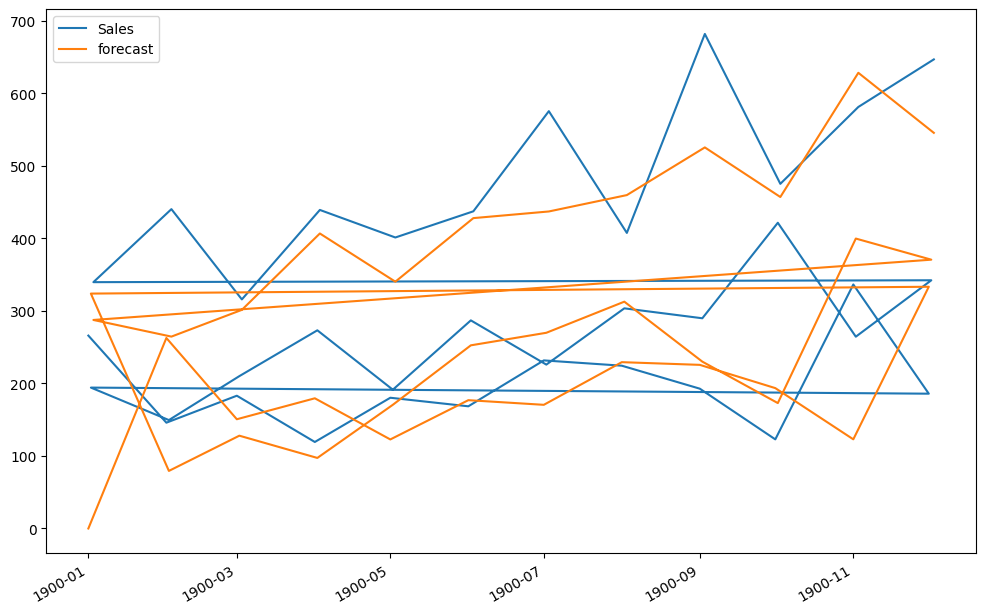

In [ ]:
future_df['forecast'] = results.predict()  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 